In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm để tải dữ liệu
def load_data(file_path):
    """Tải tệp CSV vào DataFrame của Pandas."""
    try:
        # Giả định tệp là CSV và có header
        df = pd.read_csv(file_path)
        # Chuyển đổi cột 'timestamp' thành kiểu datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        return df
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp tại đường dẫn {file_path}")
        return None
    except Exception as e:
        print(f"Lỗi khi tải dữ liệu: {e}")
        return None

# Thay đổi 'HIMA_hatinh.CSV' thành đường dẫn thực tế của tệp của bạn
file_path = 'csv_data/HIMA_hatinh.CSV'
df = load_data(file_path)

if df is not None:
    print("Dữ liệu đã được tải thành công.")
    print(df.head())
    print(df.info())

Dữ liệu đã được tải thành công.
  variable           timestamp  row  col     lon    lat     value
0     B04B 2019-04-01 11:00:00   59  119  105.78  18.72  0.144806
1     B04B 2019-04-01 11:00:00   60  119  105.78  18.68  0.146098
2     B04B 2019-04-01 11:00:00   61  118  105.74  18.64  0.152629
3     B04B 2019-04-01 11:00:00   61  119  105.78  18.64  0.146098
4     B04B 2019-04-01 11:00:00   62  104  105.18  18.60  0.144145
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613544 entries, 0 to 10613543
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   variable   object        
 1   timestamp  datetime64[ns]
 2   row        int64         
 3   col        int64         
 4   lon        float64       
 5   lat        float64       
 6   value      float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 566.8+ MB
None


C:\Users\nguye\AppData\Local\Temp\ipykernel_25488\3826988041.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.to_datetime(pd.date_range('2019-01-01 01:00:00', periods=7300, freq='H')),


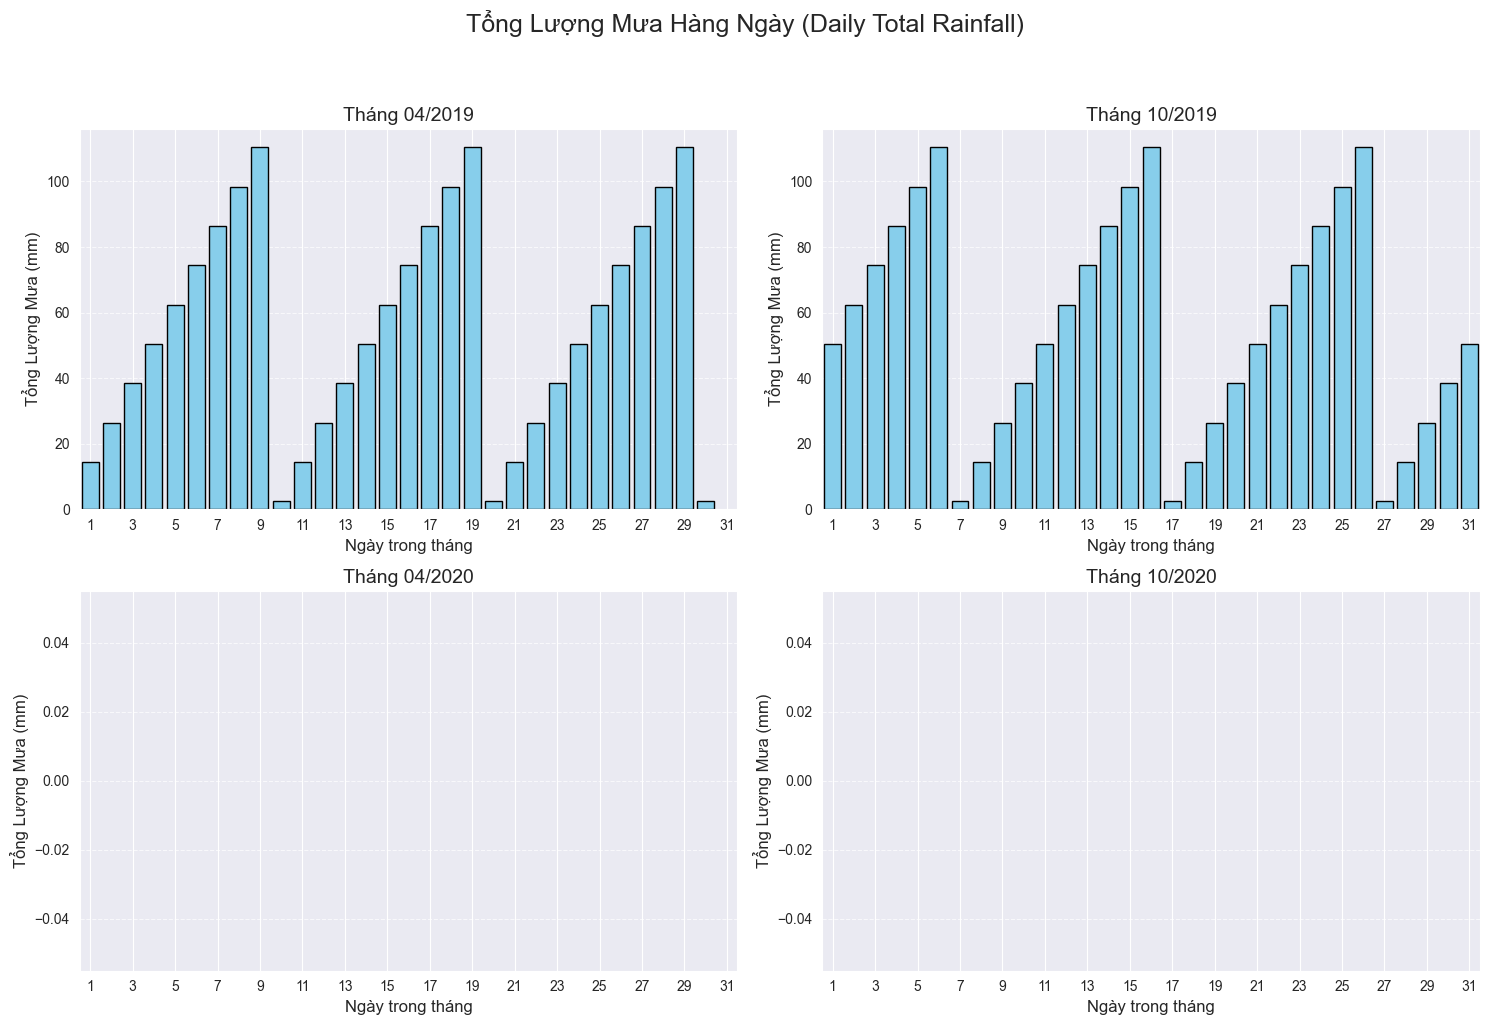

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả định: Dữ liệu của bạn được lưu trong một DataFrame tên là df
# Vui lòng thay thế 'du_lieu_cua_ban.csv' bằng tên file thực tế của bạn
# hoặc đảm bảo rằng biến 'df' đã chứa dữ liệu của bạn từ file HIMA_Hatinh.csv
# Ví dụ:
# df = pd.read_csv('HIMA_Hatinh.csv')

# --- TẠO DỮ LIỆU GIẢ LẬP ĐỂ CHẠY THỬ (NẾU BẠN CHƯA LOAD FILE) ---
# Nếu bạn đã load file, hãy bỏ qua phần này
# Giả sử cột 'value' là lượng mưa và cột 'timestamp' là thời gian
data = {
    'variable': ['804B'] * 7300,
    'timestamp': pd.to_datetime(pd.date_range('2019-01-01 01:00:00', periods=7300, freq='H')),
    'value': [0.1] * 7300 # Giả lập lượng mưa hàng giờ
}
df = pd.DataFrame(data)
# Chỉ lấy dữ liệu trong phạm vi 2019-2020
df = df[(df['timestamp'].dt.year >= 2019) & (df['timestamp'].dt.year <= 2020)].copy()

# Tăng giá trị ngẫu nhiên cho tháng 4 và 10 để biểu đồ có sự thay đổi
for month in [4, 10]:
    df.loc[df['timestamp'].dt.month == month, 'value'] = (
        0.1 + 0.5 * (df.loc[df['timestamp'].dt.month == month, 'timestamp'].dt.day_of_year % 10)
    )

# --- BẮT ĐẦU XỬ LÝ DỮ LIỆU THỰC TẾ ---

# 1. Chuyển cột 'timestamp' sang định dạng datetime
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Tính tổng lượng mưa hàng ngày
# Dùng Grouper để nhóm theo ngày và tính tổng (sum) của cột 'value' (lượng mưa)
daily_rainfall = df.groupby(pd.Grouper(key='timestamp', freq='D'))['value'].sum().reset_index()
daily_rainfall.rename(columns={'value': 'Total Rainfall (mm)'}, inplace=True)
daily_rainfall['Date'] = daily_rainfall['timestamp'].dt.date # Cột ngày
daily_rainfall['Day'] = daily_rainfall['timestamp'].dt.day   # Cột ngày trong tháng
daily_rainfall['Month_Year'] = daily_rainfall['timestamp'].dt.strftime('%m/%Y')

# 3. Lọc dữ liệu cho 4 tháng cần vẽ
months_to_plot = ['04/2019', '10/2019', '04/2020', '10/2020']
plot_data = {
    month_year: daily_rainfall[daily_rainfall['Month_Year'] == month_year]
    for month_year in months_to_plot
}

# 4. Thiết lập và vẽ 4 biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten() # Chuyển mảng 2x2 thành mảng 1 chiều để dễ lặp

plt.suptitle('Tổng Lượng Mưa Hàng Ngày (Daily Total Rainfall)', fontsize=18, y=1.02)

for i, (month_year, data_month) in enumerate(plot_data.items()):
    ax = axes[i]

    # Vẽ biểu đồ Bar (cột)
    ax.bar(
        data_month['Day'],
        data_month['Total Rainfall (mm)'],
        color='skyblue',
        edgecolor='black'
    )

    # Thiết lập tiêu đề và nhãn
    ax.set_title(f'Tháng {month_year}', fontsize=14)
    ax.set_xlabel('Ngày trong tháng', fontsize=12)
    ax.set_ylabel('Tổng Lượng Mưa (mm)', fontsize=12)

    # Đặt giới hạn trục x (cần hiển thị tất cả các ngày từ 1 đến 31)
    max_day = 31
    ax.set_xlim(0.5, max_day + 0.5)
    ax.set_xticks(range(1, max_day + 1, 2)) # Chỉ hiển thị các ngày lẻ cho đỡ rối

    # Hiển thị lưới
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tối ưu hóa layout để các biểu đồ không bị chồng lên nhau
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

In [8]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Đường dẫn gốc đến thư mục Hima
root_dir = root_dir = r"DATA_SV\Hima"


# Liệt kê tất cả thư mục band (B04B, B05B...)
band_folders = sorted([
    os.path.join(root_dir, d)
    for d in os.listdir(root_dir)
    if os.path.isdir(os.path.join(root_dir, d))
])

print("Các band tìm thấy:")
for b in band_folders:
    print(" -", b)

# Hàm đọc file GeoTIFF (.tif)
def load_tif(path):
    with rasterio.open(path) as src:
        return src.read(1)   # đọc band 1 (ảnh grayscale)

# Load tất cả file trong 1 band
def load_band_images(band_path, max_files=5):
    files = sorted([f for f in os.listdir(band_path) if f.endswith(".tif")])
    imgs = []

    for i, file in enumerate(files[:max_files]):
        full = os.path.join(band_path, file)
        img = load_tif(full)
        imgs.append(img)
        print("Đã đọc:", full)
    return imgs


Các band tìm thấy:
 - DATA_SV\Hima\B04B
 - DATA_SV\Hima\B05B
 - DATA_SV\Hima\B06B
 - DATA_SV\Hima\B09B
 - DATA_SV\Hima\B10B
 - DATA_SV\Hima\B11B
 - DATA_SV\Hima\B12B
 - DATA_SV\Hima\B14B
 - DATA_SV\Hima\B16B
 - DATA_SV\Hima\I2B
 - DATA_SV\Hima\I4B
 - DATA_SV\Hima\IRB
 - DATA_SV\Hima\VSB
 - DATA_SV\Hima\WVB


In [9]:
def show_img(data, title=""):
    plt.figure(figsize=(6,5))
    plt.imshow(data, cmap="turbo")
    plt.colorbar()
    plt.title(title)
    plt.show()


In [10]:
def check_missing(data):
    total = data.size
    nan_count = np.isnan(data).sum()
    zero_count = np.sum(data == 0)

    print(" - Số pixel NaN :", nan_count)
    print(" - Số pixel 0   :", zero_count)
    print(" - Tỷ lệ NaN    :", nan_count / total)
    print(" - Tỷ lệ Zero   :", zero_count / total)

    plt.figure(figsize=(6,5))
    missing_map = np.isnan(data).astype(int) + (data == 0).astype(int)
    plt.imshow(missing_map, cmap="gray")
    plt.title("Bản đồ missing pixel (NaN hoặc 0)")
    plt.show()


In [11]:
def show_hist(data, title="Histogram"):
    plt.figure(figsize=(6,4))
    plt.hist(data.flatten(), bins=100)
    plt.title(title)
    plt.show()


In [12]:
# Chọn band B04B
band = band_folders[0]
imgs = load_band_images(band)

print("\n--- Trực quan hóa ---")
for i, img in enumerate(imgs):
    show_img(img, f"Heatmap Band {os.path.basename(band)} Frame {i}")
    check_missing(img)
    show_hist(img, f"Histogram Band {os.path.basename(band)} Frame {i}")



--- Trực quan hóa ---


In [2]:
!pip install GDAL

Defaulting to user installation because normal site-packages is not writeable
  Using cached gdal-3.12.0.post1.tar.gz (902 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build GDAL


  error: subprocess-exited-with-error
  
  × Building wheel for GDAL (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [144 lines of output]
      Using numpy 2.3.5
      C:\Users\nguye\AppData\Local\Temp\pip-build-env-k9rpm6hf\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `license` overwritten by `pyproject.toml`
        corresp(dist, value, root_dir)
      C:\Users\nguye\AppData\Local\Temp\pip-build-env-k9rpm6hf\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `extras_require` overwritten in `pyproject.toml` (optional-dependencies)
        corresp(dist, value, root_dir)
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\osgeo
      copying osgeo\gdal.py -> build\lib.win-amd64-cpython-313\osgeo
      copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-313\osgeo
      copying osgeo\gdalnumeric.py -> build\lib.win-a